# Тематическое моделирование

In [1]:
# 1
import pandas as pd

import yaml
import pathlib
ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

DATA_PATH = ROOT / config['api']['DATA_PATH']

In [2]:
# 2

cm_df = pd.read_csv(DATA_PATH / 'comment' / 'comments_preprocessed.csv', sep='\t')

text_df = cm_df[['id', 'snippet.videoId', 'snippet.textOriginal', 'preprocessed_text']].copy(deep=True)


text_df = text_df.dropna()

display(text_df)

/var/folders/s5/4r_7wwf925g2bnv4060z0x400000gn/T/ipykernel_53411/2144707200.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  cm_df = pd.read_csv(DATA_PATH / 'comment' / 'comments_preprocessed.csv', sep='\t')


,id,snippet.videoId,snippet.textOriginal,preprocessed_text
0,UgyKlKuQTfZlkw5sqeN4AaABAg,AAjsSrjZXsw,"Люди тупые, они не понимают, что оригинал стои...",человек тупой понимать оригинал стоять офигенн...
1,UgwWFRz63uP9kl_Ob-14AaABAg,AAjsSrjZXsw,А где покупать можно качественный оригинальнал?,покупать качественный оригинальнал
2,UgwbiFK59dfmyltqrB94AaABAg,AAjsSrjZXsw,Садовод типо рынка Черкизон?,садовод типо рынок черкизон
3,UgxQi90tx9SVF0IauDN4AaABAg,AAjsSrjZXsw,Не понимаю маниакального желания покупать коре...,понимать маниакальный желание покупать корейск...
4,UgwYIO4Dwr8lwOl5_jl4AaABAg,AAjsSrjZXsw,Пару лет назад на Озон купила духи D&G The One...,пара год назад озон купить дух d g the one жен...
...,...,...,...,...
74944,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOBOzHra8u,boB2LEXG_zA,@Nadeschda Schmunk на Мальте,schmunk мальта
74945,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOAgUwU2Jj,boB2LEXG_zA,@Elena CamilleriУ вас итальянская фамилия...в ...,camilleriу итальянский фамилия италия марципан...
74946,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kOABWk8eEa,boB2LEXG_zA,и вообще невкусный... я только батончики марци...,вообще невкусный батончик марципановый шоколад...
74947,Ugwz6GshlUZMMumE9n54AaABAg.9kO7ERtCXa_9kO9mW3prUk,boB2LEXG_zA,А у нас это каштаны называют и кулинарные изде...,это каштан называть кулинарный изделие миндаль...


## Оценка токенов

In [3]:
# 3 Токенизация и
from nltk import word_tokenize

all_text = [word_tokenize(line) for line in text_df.preprocessed_text.values]

from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))

print('Всего токенов:', fd.N())

for i in fd.most_common(10):
    print(i)

Всего токенов: 765394
('спасибо', 12689)
('очень', 12263)
('это', 10953)
('косметика', 9995)
('видео', 8963)
('кожа', 8075)
('корейский', 7264)
('крем', 6370)
('ваш', 5459)
('весь', 5059)


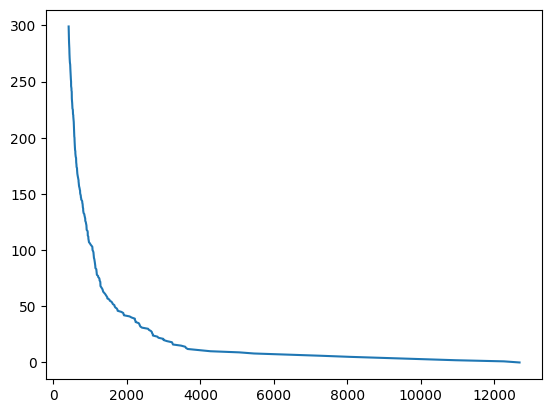

In [4]:
# 4

import matplotlib.pyplot as plt

freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

# Gensim Pipeline

In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora
from pprint import pprint


# Create Dictionary
id2word = corpora.Dictionary(all_text)

# Create Corpus
texts = all_text
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [6]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=42,
                                           chunksize=100,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"просто" + 0.035*"лицо" + 0.033*"пользоваться" + 0.033*"сказать" + '
  '0.032*"знать" + 0.029*"говорить" + 0.026*"бренд" + 0.026*"покупать" + '
  '0.018*"использовать" + 0.016*"здравствовать"'),
 (1,
  '0.099*"очень" + 0.051*"хороший" + 0.039*"делать" + 0.036*"цена" + '
  '0.031*"большой" + 0.027*"нравиться" + 0.022*"давать" + 0.020*"помогать" + '
  '0.017*"т" + 0.015*"мало"'),
 (2,
  '0.056*"год" + 0.037*"купить" + 0.030*"понимать" + 0.023*"день" + '
  '0.021*"деньги" + 0.020*"сыворотка" + 0.020*"видеть" + 0.019*"именно" + '
  '0.018*"находить" + 0.017*"маска"'),
 (3,
  '0.053*"смотреть" + 0.044*"жить" + 0.032*"любить" + 0.026*"понравиться" + '
  '0.024*"город" + 0.018*"тонер" + 0.018*"ссылка" + 0.018*"второй" + '
  '0.016*"считать" + 0.016*"прямой"'),
 (4,
  '0.068*"спасибо" + 0.044*"ваш" + 0.042*"видео" + 0.031*"хотеть" + '
  '0.025*"написать" + 0.018*"посмотреть" + 0.017*"сделать" + 0.016*"канал" + '
  '0.012*"оля" + 0.012*"результат"'),
 (5,
  '0.046*"разный" + 0.044

In [7]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=all_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.390018714308084

Coherence Score:  0.5921319157606397


In [8]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.384897  0.110927       1        1  17.156659
6      0.037888 -0.362074       2        1  12.974709
0      0.053888 -0.183074       3        1  12.543857
4     -0.109968  0.121320       4        1  11.829598
2     -0.017522  0.049950       5        1  11.049742
9      0.095310  0.116598       6        1  10.642976
1     -0.105935  0.080750       7        1  10.345497
3     -0.116920  0.016916       8        1   5.004164
5     -0.107620  0.011741       9        1   4.378487
7     -0.114018  0.036946      10        1   4.074310, topic_info=              Term          Freq         Total Category  logprob  loglift
95             это  14642.000000  14642.000000  Default  30.0000  30.0000
23            кожа   9322.000000   9322.000000  Default  29.0000  29.0000
62           очень   7864.000000   7864.000000  Default  28.0000  28.0000
25       косметика   6348.000000   6348.000000  Default  27.0000  27.0000
149        спасибо   6147.000000   6147.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1402           дом    317.929204    318.845210  Topic10  -4.5858   3.1976
3591          душа    315.817237    316.733397  Topic10  -4.5925   3.1976
351           цвет    313.652586    314.568577  Topic10  -4.5994   3.1976
344   представлять    287.601670    288.517605  Topic10  -4.6861   3.1973
523        красный    281.160575    282.076738  Topic10  -4.7088   3.1972

[351 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
4067       9  0.997881            s
1476       9  0.998213        адрес
1660       9  0.998913     аллергия
20326      7  0.998707          аня
1249       7  0.998228  благодарить
...      ...       ...          ...
95         5  0.000546          это
95         6  0.000068          это
1740       5  0.999370       эффект
127        9  0.999015       яблоко
128        9  0.998625         язык

[363 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 1, 5, 3, 10, 2, 4, 6, 8])

## Old Fashioned

In [ ]:
# 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorization_params = {
    'ngram_range' : (1,2), # Токены и словосочетания
    'max_df': 0.95, # Токен не может быть встречаться чаще, чем в 95% текстов
    'min_df': 0.0001, # Токен не может быть встречаться чаще, чем в 0.01% текстов
    'analyzer': 'word'
}

# Векторизация по частотам
cnt_vect = CountVectorizer(**vectorization_params)
# Векторизация по метрике TFIDF
tfidf = TfidfVectorizer(**vectorization_params)


In [ ]:
# 6 Преобразование

cnt_m_sparse = cnt_vect.fit_transform(text_df['preprocessed_text'])
tfidf_m_sparse = cnt_vect.fit_transform(text_df['preprocessed_text'])


print('Размер разряженной матрицы', cnt_m_sparse.shape)

In [ ]:
token_names = list(cnt_vect.vocabulary_.keys())

len(token_names)

In [ ]:
# 7 Ма
# Извлекаем какие токены мы берем
token_names = list(cnt_vect.vocabulary_.keys())

# подставляем их, чтобы просмотреть матрицу частот
cmatrix = pd.DataFrame.sparse.from_spmatrix(cnt_m_sparse, columns=token_names)
cmatrix.head()

In [ ]:
# Снижение размерности

In [ ]:
from sklearn.decomposition import (PCA,
                                   TruncatedSVD)

pca = PCA()

pca = pca.fit(cnt_m_sparse.toarray(), show_results=True)

In [ ]:
data = cmatrix.drop(['snippet.textOriginal', 'Предобработанный текст'], axis=1).sum()

data = pd.Dataframe(data, columns=['Токенов_в_корпусе'])
ss = ScaleStatistics(data[['Токенов_в_корпусе']])

data = cmatrix.drop(['snippet.textOriginal', 'Предобработанный текст']), axis =1).T.sum()

data = pd.DataFrame(data, columns=['Токенов_в_документе'])
ss = ScaleStatistics(data[['Токенов_в_документе']])

In [ ]:
data = pandas.DataFrame()
data = cmatrix.drop(['snippet.textOriginal', 'Предобработанный текст'], axis=1)
data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca = pca.fit(data)

In [ ]:
pca = PCA(n_components=133, rotation='varimax')

In [ ]:
pca = pca.fit(data, show_results = False)

In [ ]:
break

In [ ]:
component_loading_rotated = pca.component_loadings_rotated
component_loadings_rotated.to_csv(f'{path}\\component_loadings_rotated.xlsx')
component_loadings_rotated

In [ ]:
scores = pca.transform(data)
scores = pandas.concat([cmatrix[['snippet.textOriginal', 'Предобработанный текст']], scores], axis =1)
scores.to_csv(f'{path}\\scores.xlsx')
scores

In [ ]:
loadings_treshold = 0.50
n_token = 15
n_docs = 15

summary = pandas.DataFrame()
errors =[]
for i in range [1:]:
    try:
        print(f'Topic PC{i}_vrmx')

        data = scores[f'PC{i}_vrmx']
        data.index = scores['snippet.textOriginal']
        plt.figure(figsize=(8, 6))
        plt.hist(data.dropna(), color = 'grey')
        plt.title(f"Distribution{data.name}")
        plt.xlable (f'{data name}')
        plt.ylable ('Frequency');

        plt.figure(figsize=(8, 6))
        plt.hist(data.dropna())
        plt.title(f"Distribution{data.name}")
        plt.xlable ([])
        plt.ylable (f'{data.name}')
        plt.show()

        topic_tokens = pandas.concat([data[data.abs() > loadings_treshold].sort_values(ascending = False).head(n_tokens),
                                     data[data.abs() > - loadings_treshold].sort_values().head(n_tokens)])
        display(f'Токены на полюсах топика PC{i}_vrmx', topic_tokens)

        summary_additional = pandas.DataFrame()
        summary_plus = pandas.DataFrame()
        if len(data[data > loadings_treshold].sort_values(ascending = False).head(n_tokens))>0:
            summary_plus = topic_docs[topic_docs[f'PC{i}_vrmx']>0].round(3)
            summary_plus.loc[:,'Topic'] = i
            summary_plus.loc[:,'Токены'] = ','.join(list(data[data>loadings_treshold].sort_valoues(ascending = False).head(n_tokens).index))
            summary_plus.loc[:,'Токны_mean_loading'] = data[data>loadingloadings_treshold].sort_valoues(ascending = False).head(n_tokens).mean()
            summary_plus.loc[:,'Релевантность_теме_исследования']=''
            summary_plus.loc[:,'Название_топика'] =''

        summary_minus = pandas.DataFrame()
        if len(data[data < - loadings_treshold].sort_valoues(ascending = False).head(n_tokens))>0:
            summary_minus = topic_docs[topic_docs[f'PC{i}_vrmx']<0].round(3)
            summary_minus.loc[:,'Topic'] = i
            summary_minus.loc[:,'Токены'] = ','.join(list(data[data>loadings_treshold].sort_valoues(ascending = False).head(n_tokens).index)
            summary_minus.loc[:,'Токны_mean_loading'] = data[data>loadingloadings_treshold].sort_valoues(ascending = False).head(n_tokens).mean()
            summary_minus.loc[:,'Релевантность_теме_исследования'] = ''
            summary_minus.loc[:,'Название_топика'] = ''

        summary_additional = pd.concat([summary_plus,summary_minus])
        summary_additional.columns = ['Текс_на_предобработку',
                                     'scores',
                                     'Topic',
                                     'Токены',
                                     'Токны_mean_loading',
                                     'Название_топика']
        summary = pandas.concat([summary,summary_additional])
    except:
        print(f'Ошибка при обработке топика {i}')
        errors.append(i)
    

In [ ]:
errors

In [ ]:
summary.to_exel(f'Топики.xlsx')